# Redes Neurais 🧠💻
## Classificando roupas do conjunto de dados MNIST 🛍️👖👗

O objetivo deste projeto é desenvolver e treinar uma rede neural para classificar imagens de roupas do conjunto de dados MNIST. Em particular, queremos que o modelo seja capaz de identificar corretamente o tipo de roupa representado em uma imagem, atribuindo a cada imagem uma das 10 classes correspondentes aos tipos de roupas listados na introdução. 

[Doc do Dataset Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pt-br)

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [62]:
import catppuccin
mpl.style.use(catppuccin.PALETTE.mocha.identifier)

## Introdução ao Dataset Fashion MNIST

In [63]:
# importando o dataset
fashion_mnist = keras.datasets.fashion_mnist

# carregando os dados de treinamento e teste
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [64]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [65]:
# relacao de label/categoria
fashion_mnist_labels = {
    0: 'T-shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}


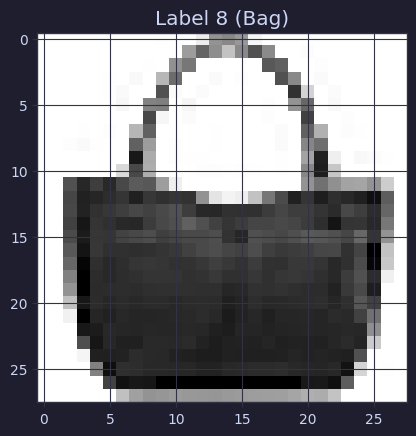

In [66]:
# visualizando imagem aleatoria (item 100 da lista de treino)
plt.imshow(train_images[100], cmap=plt.cm.binary)
# exibe a label e a sua descricao com base no dict 'fashion_mnist_labels'
plt.title(f'Label {train_labels[100]} ({fashion_mnist_labels[train_labels[100]]})')
plt.show()

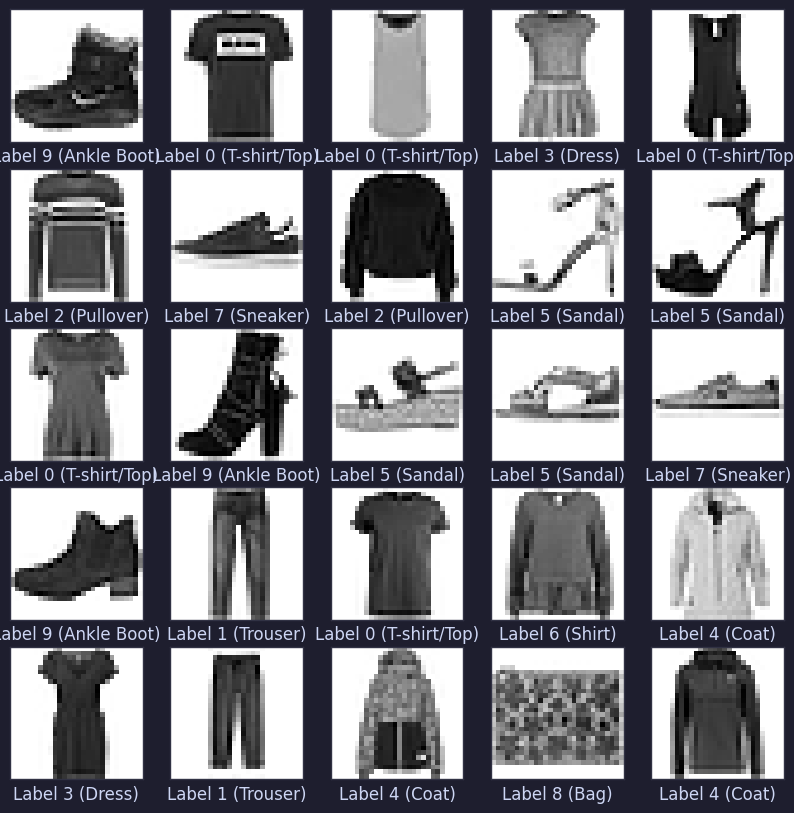

In [67]:
# visualizando as 25 primeiras imagens do dataset de treino
plt.figure(figsize=(10, 10))
for i in range(25):
    # definindo posicao do subplot
    plt.subplot(5, 5, i + 1)
    # zerando os 'ticks' para nao atrapalharem a visualizacao
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # mostrando as labels e descricao de cada img
    plt.xlabel(f'Label {train_labels[i]} ({fashion_mnist_labels[train_labels[i]]})')

plt.show()

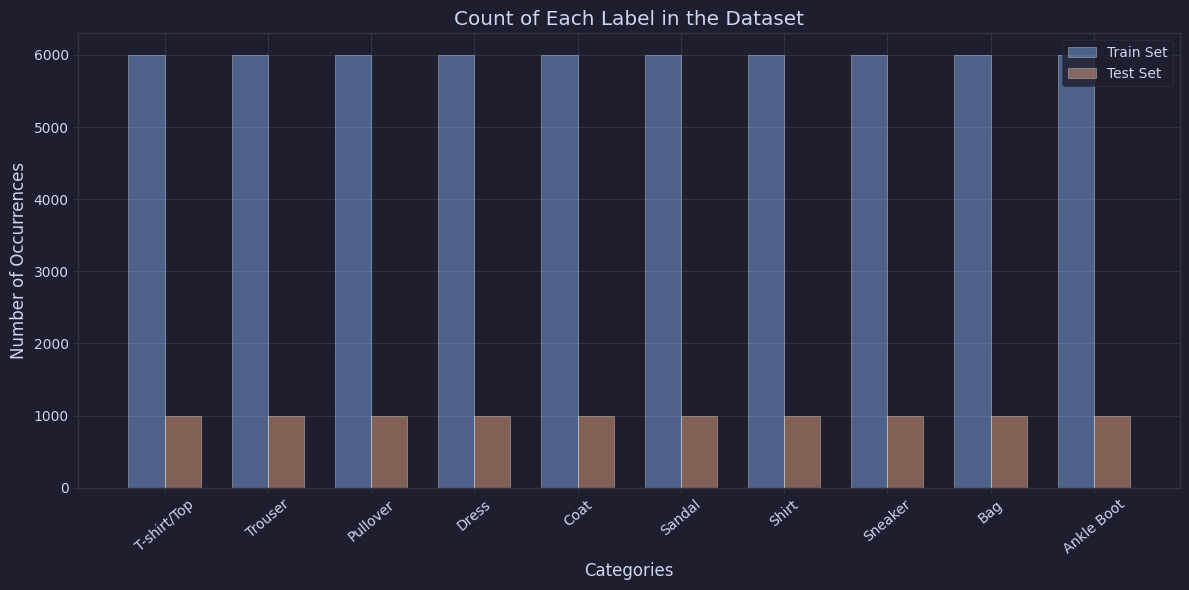

In [68]:
# contagem das ocorrencias de cada rotulo nos conjuntos de treino e teste
train_label_counts = np.bincount(train_labels)
test_label_counts = np.bincount(test_labels)

# criando o grafico
labels = list(fashion_mnist_labels.values())
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
opacity = 0.45

bar_train = ax.bar(x - bar_width/2, train_label_counts, bar_width, 
                   label='Train Set', alpha=opacity, edgecolor='white')
bar_test = ax.bar(x + bar_width/2, test_label_counts, bar_width, 
                  label='Test Set', alpha=opacity, edgecolor='white')

ax.set_xlabel('Categories')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Count of Each Label in the Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=40)
ax.legend()

plt.tight_layout()
plt.show()

## Treinando o modelo

In [69]:
# normaliza os valores de pixel para o intervalo [0, 1]
norm_train_images = train_images / 255.0
norm_test_images = test_images / 255.0

In [70]:
# visualizando um dado antes da normalizacao
train_images[100][:1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

In [71]:
# visualizando o mesmo dado depois da normalizacao
norm_train_images[100][:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.07058824, 0.41960784, 0.46666667,
        0.40392157, 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [72]:
# definir a semente para reprodutibilidade
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# modelo
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# compliando o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.fit(norm_train_images, train_labels, epochs=20)

Epoch 1/20
 166/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.6165 - loss: 1.1100

KeyboardInterrupt: 

In [ ]:
# realizando predicoes
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


## Avaliando o Modelo

In [ ]:
# visualizando a predicao para a primeira imagem do conjunto de testes
print('First prediction for the test set... 🧙‍♀️🔮')
print(f'Predicted label: {np.argmax(predictions[0])}, True label: {test_labels[0]}')

First prediction for the test set... 🧙‍♀️🔮
Predicted label: 9, True label: 9


In [ ]:
# lista com as predicoes e as labels corretas
predicted_labels = np.argmax(predictions, axis=1)
correct_labels = test_labels

# dataframe com as previsoes e as labels corretas
df = pd.DataFrame({
    'predicted label': predicted_labels,
    'true label': correct_labels
})

# coluna boleana indicando se errou
df['error'] = df['predicted label'] != df['true label']

df

,predicted label,true label,error
0,9,9,False
1,2,2,False
2,1,1,False
3,1,1,False
4,0,6,True
...,...,...,...
9995,9,9,False
9996,1,1,False
9997,8,8,False
9998,1,1,False


In [ ]:
# quantidade de erros (absoluto)
num_errors = df['error'].sum()
# quanridade de erros (%)
total_predictions = len(df)
error_percentage = (num_errors / total_predictions) * 100

print(f'Number of errors 😐: {num_errors} ({error_percentage:.2f}%)')

Number of errors 😐: 1402 (14.02%)


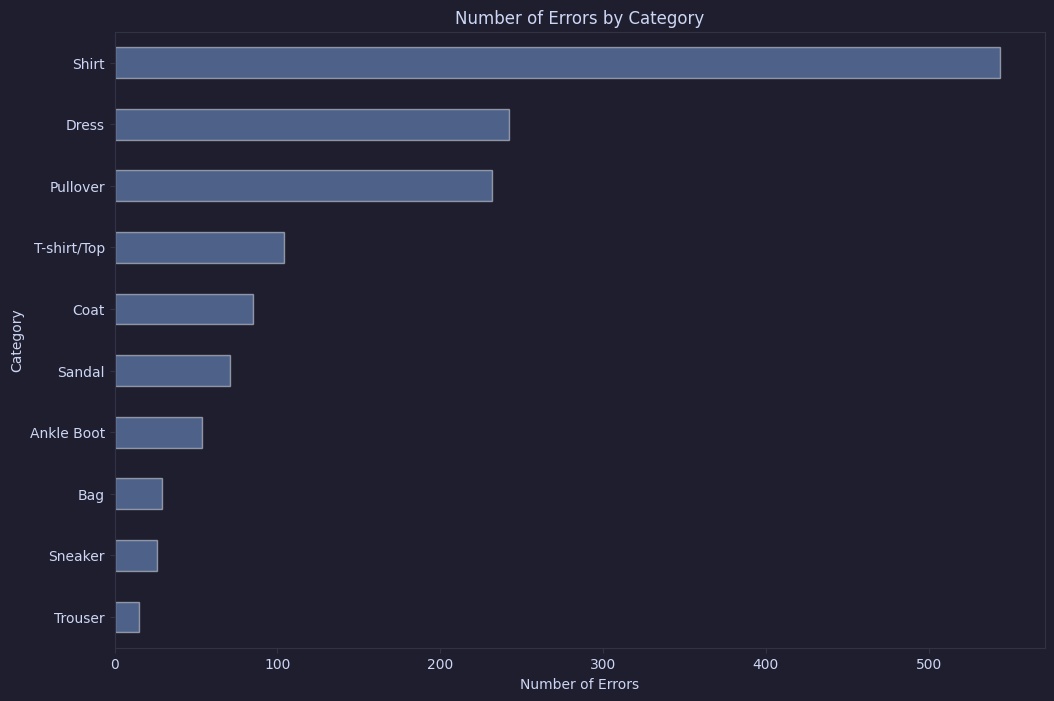

In [ ]:
# contagem do numero de erros por categoria
error_counts = df[df['error']].groupby('true label').size()

# mapeamento de indices de categorias para nomes das categorias
category_names = list(fashion_mnist_labels.values())
error_counts.index = error_counts.index.map(lambda x: fashion_mnist_labels[x])

# grafico das categorias que mais erraram
plt.figure(figsize=(12, 8))
error_counts.sort_values().plot(kind='barh', alpha=0.45, edgecolor='white')
plt.xlabel('Number of Errors')
plt.ylabel('Category')
plt.title('Number of Errors by Category')
plt.show()

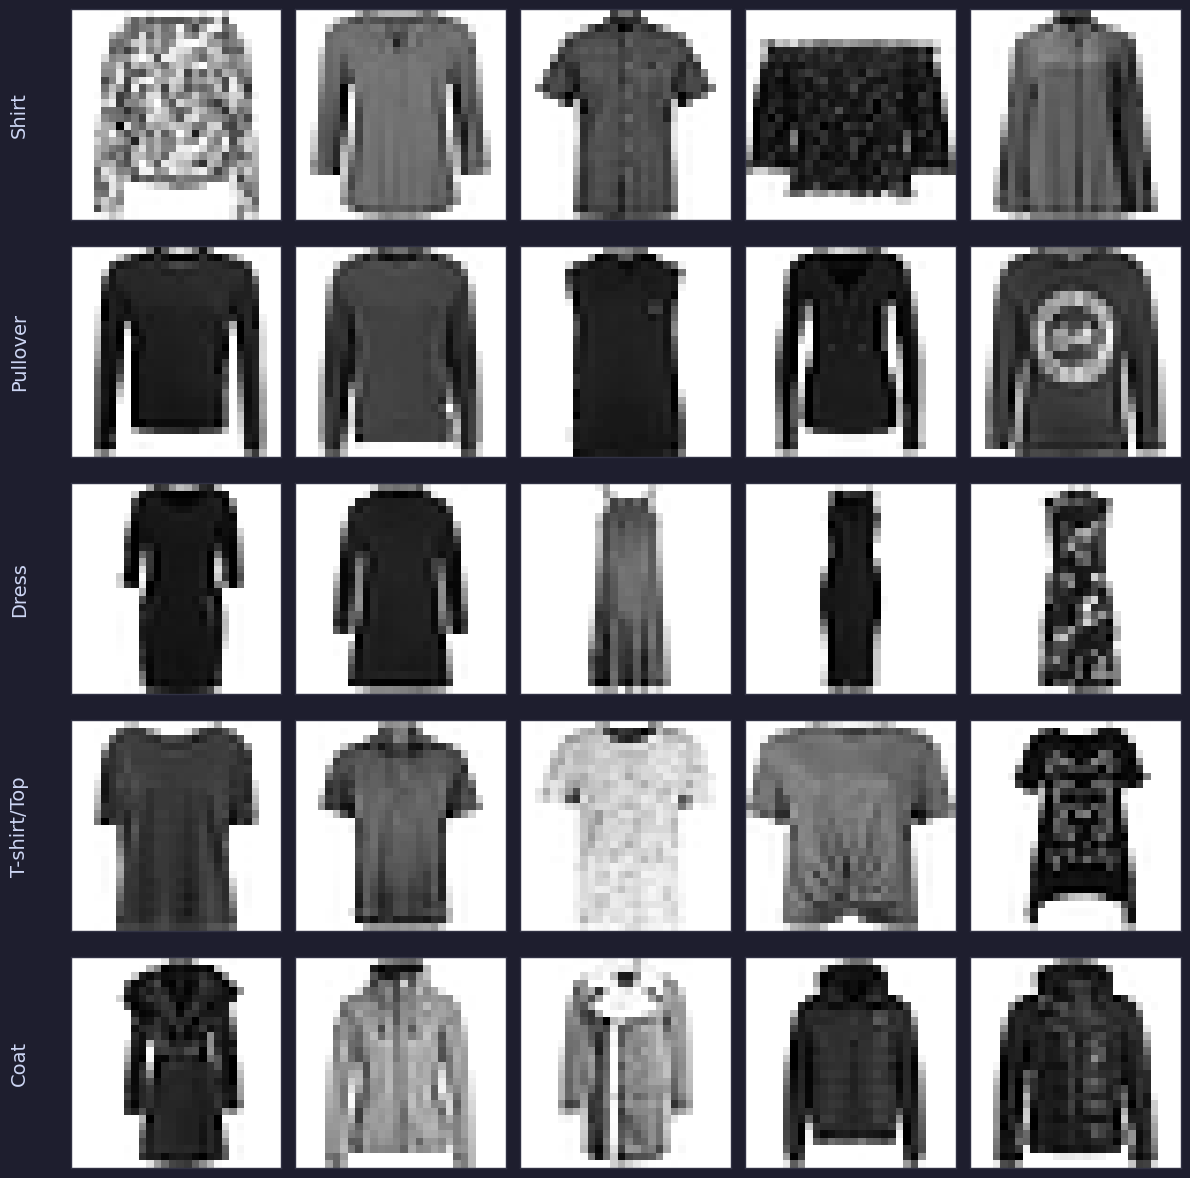

In [74]:
# categorias que queremos visualizar (as que mais erraram, indicadas no grafico acima)
categories_to_plot = ['Shirt', 'Pullover', 'Dress', 'T-shirt/Top', 'Coat']
category_indices = {category: [] for category in categories_to_plot}

# seleciona aleatoriamente 5 imagens de cada categoria mencionada
for category in categories_to_plot:
    category_label = [k for k, v in fashion_mnist_labels.items() if v == category][0]
    indices = np.where(train_labels == category_label)[0]
    selected_indices = np.random.choice(indices, 5, replace=False)
    category_indices[category] = selected_indices

# criando grafico com as categorias
plt.figure(figsize=(12, 12))
for i, category in enumerate(categories_to_plot):
    for j in range(5):
        idx = category_indices[category][j]
        # definindo posição do subplot
        plt.subplot(5, 5, i * 5 + j + 1)
        # xerando os 'ticks' para não atrapalharem a visualização
        plt.xticks([])
        plt.yticks([])
        plt.imshow(train_images[idx], cmap=plt.cm.binary)
        # mostrando as categorias
        if j == 0:
            plt.ylabel(f'{category}', fontsize=14, labelpad=30)

plt.tight_layout()
plt.show()


In [80]:
# filtrar os dados para a categoria 'Shirt' que foram classificadas incorretamente
shirt_label = 6
shirt_errors = df[(df['true label'] == shirt_label) & (df['error'])]

# add probabilidades maximas as previsoes erradas
shirt_errors['max_probability'] = [np.max(predictions[i]) for i in shirt_errors.index]
shirt_errors['predicted_category'] = [fashion_mnist_labels[pred] for pred in shirt_errors['predicted label']]

/var/folders/3v/29g79tbj0jsbv3rqr3pgykb80000gn/T/ipykernel_9710/1169943867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shirt_errors['max_probability'] = [np.max(predictions[i]) for i in shirt_errors.index]
/var/folders/3v/29g79tbj0jsbv3rqr3pgykb80000gn/T/ipykernel_9710/1169943867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shirt_errors['predicted_category'] = [fashion_mnist_labels[pred] for pred in shirt_errors['predicted label']]


In [81]:
shirt_errors.query('`predicted_category`  == "Bag"')

,predicted label,true label,error,max_probability,predicted_category
1642,8,6,True,1.0,Bag
2910,8,6,True,1.0,Bag
3741,8,6,True,1.0,Bag
4505,8,6,True,1.0,Bag
4672,8,6,True,1.0,Bag
5065,8,6,True,1.0,Bag
5510,8,6,True,1.0,Bag
5990,8,6,True,1.0,Bag
6596,8,6,True,1.0,Bag
9140,8,6,True,1.0,Bag


In [76]:
# visualizando todos os valores da coluna 'max_probability'
max_probability_values = shirt_errors['max_probability'].unique()
print('Column: max_probability (shirt errors) 👕')
print(f'Max Value: {max_probability_values.max()}')
print(f'Min Value: {max_probability_values.min()}')
print(f'Mean: {max_probability_values.mean()}')

Column: max_probability (shirt errors) 👕
Max Value: 1.0
Min Value: 0.778254508972168
Mean: 0.9816393852233887


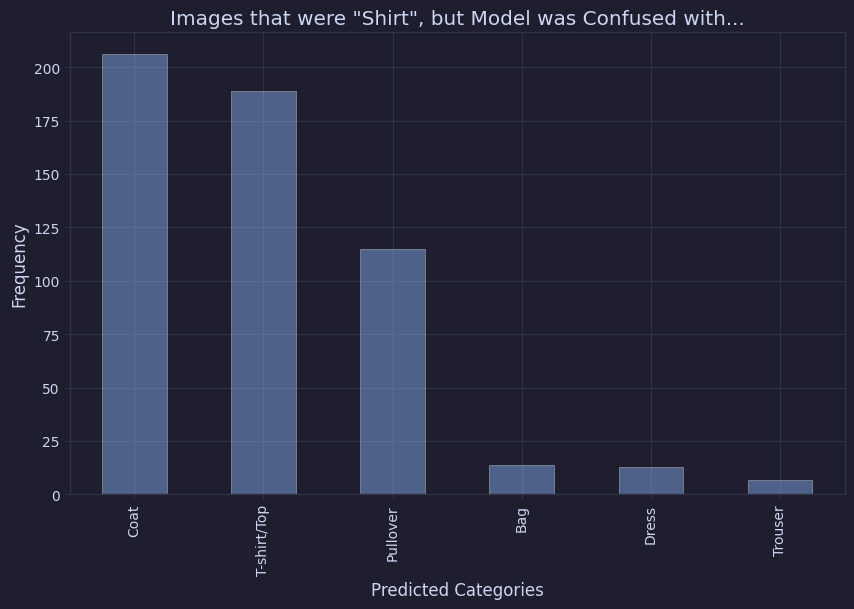

In [78]:
# Contar a frequência das categorias que o modelo achou que "Shirt" era
category_confusion = shirt_errors['predicted_category'].value_counts()

plt.figure(figsize=(10, 6))
category_confusion.plot(kind='bar', alpha=0.45, edgecolor='white')
plt.xlabel('Predicted Categories')
plt.ylabel('Frequency')
plt.title('Images that were "Shirt", but Model was Confused with...')
plt.show()

/var/folders/3v/29g79tbj0jsbv3rqr3pgykb80000gn/T/ipykernel_9710/3973553485.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pullover_errors['max_probability'] = [np.max(predictions[i]) for i in pullover_errors.index]
/var/folders/3v/29g79tbj0jsbv3rqr3pgykb80000gn/T/ipykernel_9710/3973553485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pullover_errors['predicted_category'] = [fashion_mnist_labels[pred] for pred in pullover_errors['predicted label']]


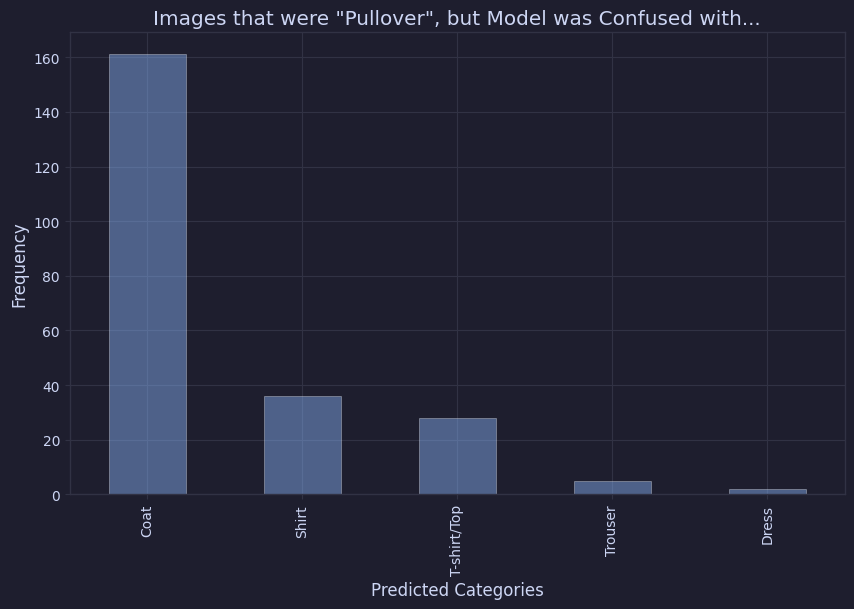

In [79]:
# filtrar os dados para a categoria 'pullover' que foram classificadas incorretamente
pullover_label = [k for k, v in fashion_mnist_labels.items() if v == 'Pullover'][0]
pullover_errors = df[(df['true label'] == pullover_label) & (df['error'])]

# add probabilidades maximas as previsoes erradas
pullover_errors['max_probability'] = [np.max(predictions[i]) for i in pullover_errors.index]
pullover_errors['predicted_category'] = [fashion_mnist_labels[pred] for pred in pullover_errors['predicted label']]

# Contar a frequência das categorias que o modelo achou que "pullover" era
category_confusion = pullover_errors['predicted_category'].value_counts()
plt.figure(figsize=(10, 6))
category_confusion.plot(kind='bar', alpha=0.45, edgecolor='white')
plt.xlabel('Predicted Categories')
plt.ylabel('Frequency')
plt.title('Images that were "Pullover", but Model was Confused with...')
plt.show()